    Temperature  Ice Cream Sales
0     27.490802      2404.155975
1     39.014286      4674.911980
2     34.639879      3693.981203
3     31.973170      3151.795554
4     23.120373      1629.728817
5     23.119890      1667.595787
6     21.161672      1420.417178
7     37.323523      4331.992200
8     32.022300      3193.464051
9     34.161452      3512.862309
10    20.411690      1366.115450
11    39.398197      4737.399677
12    36.648853      4095.569138
13    24.246782      1894.303158
14    23.636499      1827.602280
15    23.668090      1827.099487
16    26.084845      2099.296518
17    30.495129      2874.397992
18    28.638900      2577.123015
19    25.824583      2149.504487
20    32.237058      3193.724993
21    22.789877      1648.852561
22    25.842893      2048.248603
23    27.327237      2280.523293
24    29.121400      2684.794050
25    35.703519      3992.035857
26    23.993476      1823.460114
27    30.284689      2901.663766
28    31.848291      3161.022792
29    20.9

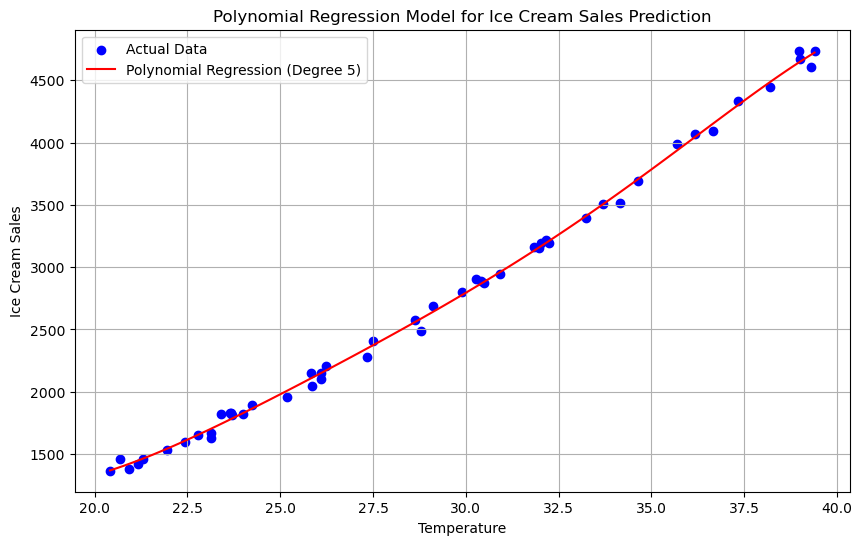


Discussing the trade-offs involved:

1.Underfitting: Lower-degree polynomial models may underfit the data and fail to capture the non-linear patterns, leading to high bias.

2.Overfitting: Higher-degree polynomial models may overfit the data, capturing noise in the training data and performing poorly on unseen data, leading to high variance.

3.Model Complexity: Increasing the degree of the polynomial increases model complexity, which can lead to overfitting.

4.Interpretability: Higher-degree polynomials are less interpretable compared to lower-degree polynomials.

5.Computational Cost: Higher-degree polynomials require more computational resources and time to train.

By experimenting with different polynomial degrees and evaluating model performance, we can choose the best trade-off between bias and variance. The selected model should generalize well to new data without overfitting or underfitting.


INTERPRETATION OF RESULTS
The results show the performance metrics (R-squared and M

In [1]:
# QUESTION 3:Polynomial Regression

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

np.random.seed(42)
temperature = np.random.uniform(20, 40, 50)
ice_cream_sales = 100 + 3*temperature**2 + np.random.normal(0, 50, 50)

poly_data = pd.DataFrame({'Temperature': temperature, 'Ice Cream Sales': ice_cream_sales})

# Display all rows of the dataset
print(poly_data)

print(""""

Fit polynomial regression models with different degrees:""")


X = poly_data[['Temperature']]
y = poly_data['Ice Cream Sales']

degrees = [2, 3, 4, 5]
best_model = None
best_degree = None
best_r2 = -1
best_mse = float('inf')

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    
    print(f'Degree {degree} - R-squared: {r2}, MSE: {mse}')
    
    if r2 > best_r2:
        best_r2 = r2
        best_mse = mse
        best_model = model
        best_degree = degree

print(f'Best model: Degree {best_degree}, R-squared: {best_r2}, MSE: {best_mse}')

# PLOT 

import matplotlib.pyplot as plt

# Scatter plot of the actual data points
plt.figure(figsize=(10, 6))
plt.scatter(poly_data['Temperature'], poly_data['Ice Cream Sales'], color='blue', label='Actual Data')

# Plot the polynomial regression curve for the best model
X_plot = np.linspace(poly_data['Temperature'].min(), poly_data['Temperature'].max(), 100).reshape(-1, 1)
X_plot_poly = PolynomialFeatures(degree=best_degree).fit_transform(X_plot)
y_plot = best_model.predict(X_plot_poly)

plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Regression (Degree {best_degree})')

plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.title('Polynomial Regression Model for Ice Cream Sales Prediction')
plt.legend()
plt.grid(True)
plt.show()


print("""
Discussing the trade-offs involved:

1.Underfitting: Lower-degree polynomial models may underfit the data and fail to capture the non-linear patterns, leading to high bias.

2.Overfitting: Higher-degree polynomial models may overfit the data, capturing noise in the training data and performing poorly on unseen data, leading to high variance.

3.Model Complexity: Increasing the degree of the polynomial increases model complexity, which can lead to overfitting.

4.Interpretability: Higher-degree polynomials are less interpretable compared to lower-degree polynomials.

5.Computational Cost: Higher-degree polynomials require more computational resources and time to train.

By experimenting with different polynomial degrees and evaluating model performance, we can choose the best trade-off between bias and variance. The selected model should generalize well to new data without overfitting or underfitting.""")


print("""

INTERPRETATION OF RESULTS
The results show the performance metrics (R-squared and Mean Squared Error) of polynomial regression models with different degrees fitted to the dataset of temperature and ice cream sales. Here's how you can interpret the results:

1.R-squared (Coefficient of Determination):

R-squared measures the proportion of the variance in the dependent variable (ice cream sales) that is predictable from the independent variable (temperature) in the model.
The R-squared values are very high for all polynomial models (close to 1), indicating that the models explain a large percentage of the variance in the ice cream sales data.
A higher R-squared value suggests that the model fits the data well and captures the underlying relationship between temperature and ice cream sales.

2.Mean Squared Error (MSE):

MSE quantifies the average squared difference between the actual and predicted values in the model.
The MSE values decrease as the degree of the polynomial increases, indicating better model performance in capturing the data's variability.
A lower MSE indicates that the model's predictions are closer to the actual data points, reflecting better model accuracy.

3.Best Model Selection:

The best model is chosen based on both R-squared and MSE values. In this case, the model with a degree of 5 has the highest R-squared value (0.9981) and the lowest MSE (1959.81), indicating the best overall performance among the tested models.
Degree 5 polynomial model captures the underlying relationship between temperature and ice cream sales with the highest accuracy and the least error compared to other polynomial models.""")